In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
!unzip '/content/drive/MyDrive/project1.zip' -d Project

Archive:  /content/drive/MyDrive/project1.zip
   creating: Project/project1/
  inflating: Project/project1/IMG_20210310_105236.jpg  
  inflating: Project/project1/IMG_20210310_105529.jpg  
  inflating: Project/project1/IMG_20210310_105538.jpg  
  inflating: Project/project1/IMG_20210310_105548.jpg  
  inflating: Project/project1/IMG_20210310_105555.jpg  
   creating: Project/project1/test/
   creating: Project/project1/test/Gate/
  inflating: Project/project1/test/Gate/gate (1).jpg  
  inflating: Project/project1/test/Gate/gate (19).jpg  
  inflating: Project/project1/test/Gate/gate (23).jpg  
  inflating: Project/project1/test/Gate/gate (3).jpg  
  inflating: Project/project1/test/Gate/gate (33).jpg  
  inflating: Project/project1/test/Gate/gate (40).jpg  
  inflating: Project/project1/test/Gate/gate (7).jpg  
   creating: Project/project1/test/op_amp/
  inflating: Project/project1/test/op_amp/op_amp (1).jpg  
  inflating: Project/project1/test/op_amp/op_amp (13).jpg  
  inflating: Pr

In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
DATASET_DIR = "/content/Project/project1/train"

In [ ]:
os.listdir(DATASET_DIR)

['op_amp', 'Gate', 'resistor', 'transistor']

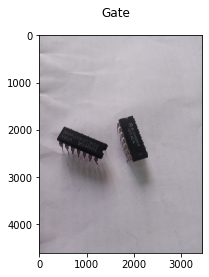

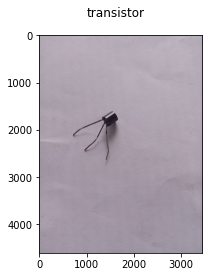

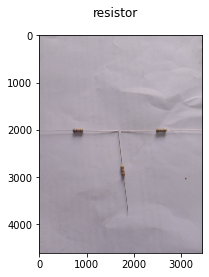

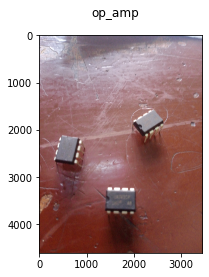

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Gate_images = []
for img_path in glob.glob(DATASET_DIR + '/Gate/*'):
    Gate_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Gate')
plt.imshow(Gate_images[0], cmap='gray') 

transistor_images = []
for img_path in glob.glob(DATASET_DIR + '/transistor/*'):
    transistor_images.append(mpimg.imread(img_path))


fig = plt.figure()
fig.suptitle('transistor')
plt.imshow(transistor_images[0], cmap='gray') 

resistor_images = []
for img_path in glob.glob(DATASET_DIR + '/resistor/*'):
     resistor_images.append(mpimg.imread(img_path))


fig = plt.figure()
fig.suptitle('resistor')
plt.imshow( resistor_images[0], cmap='gray') 

op_amp_images = []
for img_path in glob.glob(DATASET_DIR + '/op_amp/*'):
    op_amp_images.append(mpimg.imread(img_path))


fig = plt.figure()
fig.suptitle('op_amp')
plt.imshow(op_amp_images[0], cmap='gray') 


In [ ]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5],
                             validation_split=0.2
                            )

train_gen= datagen.flow_from_directory(DATASET_DIR,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='training'
                                      )
val_gen = datagen.flow_from_directory( DATASET_DIR,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='validation'
                                      )

Found 105 images belonging to 4 classes.
Found 25 images belonging to 4 classes.


In [ ]:

import os
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from random import choices
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from keras.applications.resnet import ResNet50
IMG_W = 224
IMG_H = 224
CHANNELS = 3

input = (IMG_W, IMG_H, CHANNELS)


In [ ]:
ResNet = ResNet50(weights = 'imagenet', input_shape = input, include_top=False)

# Flatten output layer of Resnet
flattened = tf.keras.layers.Flatten()(ResNet.output)

#Fully connected layer 1
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = tf.keras.layers.Dense(1, activation='softmax', name="AddedDense2")(fc1)

model = tf.keras.models.Model(inputs=ResNet.input, outputs=fc2)

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(train_gen, batch_size = 32, validation_data = val_gen, epochs = 20)

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

1/1 - 5s - loss: -9.9708e+06 - accuracy: 0.2400


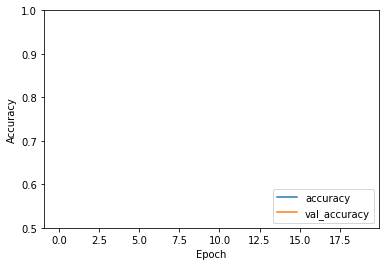

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
val_loss, val_acc = model.evaluate(val_gen,  verbose=2)

In [ ]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model

from keras.models import model_from_json
json_file = open('model_digit.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_digit.h5")
print("Loaded model from disk")
# y = loaded_model.predict_classes(val_gen)

Loaded model from disk


In [ ]:
prediction = np.argmax(model.predict(val_gen), axis=-1)

In [ ]:
fig.savefig("prediction.png")